# Worksheet 5

*   *Name: Shreejal Khatri*
*   *University ID: 2358168*


# Task 1: Data Understanding and Visualization

1. Load and visualize images from a dataset stored in directories, where each subdirectory represents a class.

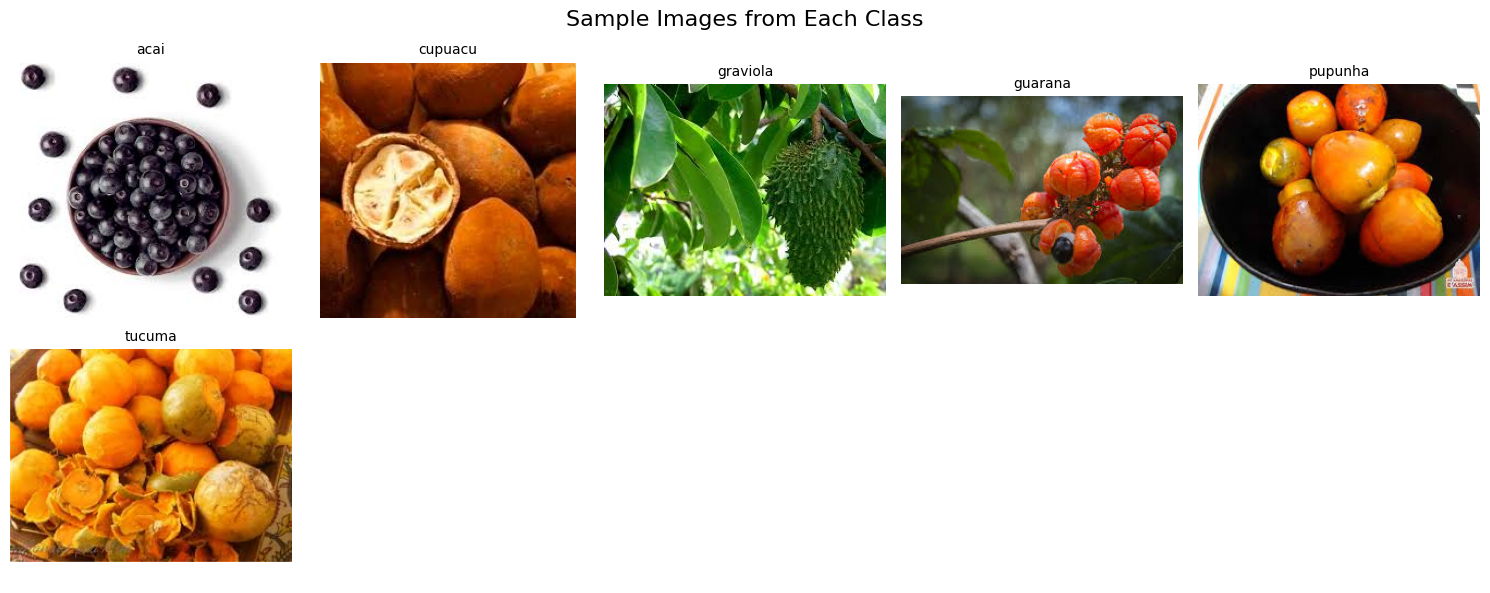

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/MLutilites/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


2. Check for Corrupted Image

In [2]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/MLutilites/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [3]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 2: Loading and Preprocessing Image Data in keras

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

In [5]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Task 4: Train the Model

In [6]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Shreejal Khatri.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.2297 - loss: 1.8520
Epoch 1: val_loss improved from inf to 1.47428, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 877ms/step - accuracy: 0.2313 - loss: 1.8619 - val_accuracy: 0.4444 - val_loss: 1.4743
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.2639 - loss: 1.8528
Epoch 2: val_loss did not improve from 1.47428
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.2708 - loss: 1.8408 - val_accuracy: 0.6111 - val_loss: 1.5502
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.4138 - loss: 1.6388
Epoch 3: val_loss did not improve from 1.47428
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.4214 - loss: 1.6304 - val_accuracy: 0.1667 - val_loss: 1.9443
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.2639 - loss: 1.5872
Epoch 4: val_loss did not improve from 1.47428
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - accuracy: 0.2708 - loss: 1.5730 - val_accuracy: 0.4444 - val_loss: 1.6018
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.5926 - loss: 1.2148
Epoch 5: val_loss improved from 1.47428 to 0.94458, saving 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.6076 - loss: 1.2129 - val_accuracy: 0.6667 - val_loss: 0.9446
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.6128 - loss: 1.0586
Epoch 6: val_loss did not improve from 0.94458
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.6263 - loss: 1.0467 - val_accuracy: 0.5000 - val_loss: 1.3359
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.8513 - loss: 0.7795
Epoch 7: val_loss did not improve from 0.94458
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.8433 - loss: 0.7846 - val_accuracy: 0.3889 - val_loss: 1.6013
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.6493 - loss: 1.0004
Epoch 8: val_loss improved from 0.94458 to 0.65968, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.6536 - loss: 0.9918 - val_accuracy: 0.8333 - val_loss: 0.6597
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.8900 - loss: 0.5184
Epoch 9: val_loss did not improve from 0.65968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.8898 - loss: 0.5200 - val_accuracy: 0.7778 - val_loss: 0.6969
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9294 - loss: 0.3717
Epoch 10: val_loss did not improve from 0.65968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.9332 - loss: 0.3654 - val_accuracy: 0.7222 - val_loss: 0.7744
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9699 - loss: 0.2315
Epoch 11: val_loss improved from 0.65968 to 0.50354, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.9705 - loss: 0.2257 - val_accuracy: 0.8333 - val_loss: 0.5035
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 1.0000 - loss: 0.1238
Epoch 12: val_loss improved from 0.50354 to 0.47660, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 766ms/step - accuracy: 1.0000 - loss: 0.1210 - val_accuracy: 0.8889 - val_loss: 0.4766
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9797 - loss: 0.0741
Epoch 13: val_loss improved from 0.47660 to 0.44565, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.9813 - loss: 0.0727 - val_accuracy: 0.8333 - val_loss: 0.4456
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0378
Epoch 14: val_loss improved from 0.44565 to 0.36688, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 0.8889 - val_loss: 0.3669
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 1.0000 - loss: 0.0329
Epoch 15: val_loss did not improve from 0.36688
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 1.0000 - loss: 0.0320 - val_accuracy: 0.8889 - val_loss: 0.3716
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 1.0000 - loss: 0.0136
Epoch 16: val_loss did not improve from 0.36688
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 0.8889 - val_loss: 0.4235
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 17: val_loss did not improve from 0.36688
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 921ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8889 - val_loss: 0.4254
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 18: val_loss did not improve from 0.36688
3/3 

# Task 5: Evaluate the Model

In [7]:
test_dir = '/content/drive/MyDrive/MLutilites/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7667 - loss: 132.1638
Test Loss: 132.16375732421875
Test Accuracy: 0.7666666507720947


# Task 6: Save and Load the Model

In [8]:

model.save('shreejal_khatri_model.h5')
print("Model saved successfully!")


Model saved successfully!


# Task 7: Predictions and Classification Report

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.84      0.77      0.77        30
weighted avg       0.84      0.77      0.77        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.0294
Epoch 1: val_loss did not improve from 0.36688
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.8889 - val_loss: 0.4229
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0180
Epoch 2: val_loss did not improve from 0.36688
3/3 ━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.8333 - val_loss: 0.3632
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 5: val_loss did not improve from 0.36316
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.8333 - val_loss: 0.3659
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 6: val_loss did not improve from 0.36316
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8889 - val_loss: 0.3861
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 1.0000 - loss: 0.0055
Epoch 7: val_loss did not improve from 0.36316
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8889 - val_loss: 0.4041
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 8: val_loss did not improve from 0.36316
3/3 ━━━━━━━━━━━

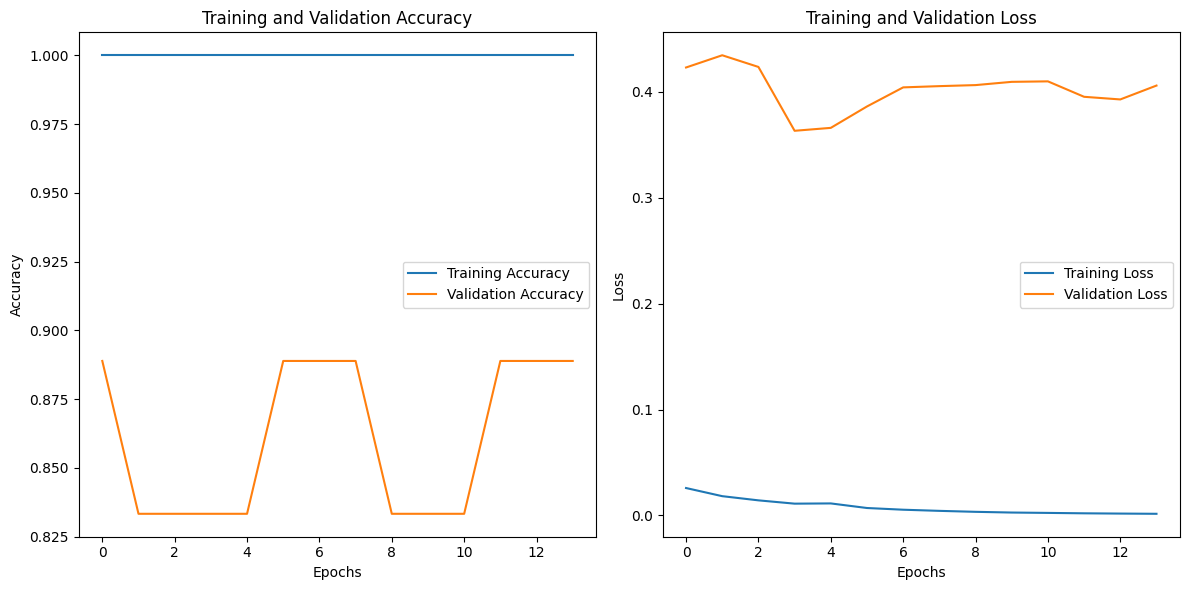

Model saved as 'shreejal_khatri_model.h5'


In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('shreejal_khatri_model.h5')
print("Model saved as 'shreejal_khatri_model.h5'")
